![tile](./cover.png)
# Misión
En esta práctica vamos a aplicar calcular las curvas de dispersión para un conjunto de datos sintéticos correspondientes a un perfíl sísmico de ondas superficiales (**MASW**). 
# Introducción
El método de análisis de ondas superficiales multicanal (**Multichannel Analysis of Surface Wave**) es una técnica de exploración geofísica ampliamente utilizada en la industria para determinar el tipo de suelo. El cual consiste en analizar los espectros en frecuencia de los datos colectados en campo. A partir de los cuales se puede calcular las curvas de dispersión. <br>

# Calculo de las curvas de dispersión
Para llevar acabo el cálculo de las curvas de dispersión es necesario calcular el espectro de cada uno de los canales utilizandola **Transformada de Fourier**. 

$$
\begin{equation}
\mathscr{F}\left\{f(t)\right\}=F(\omega)=\int^\infty_\infty f(t)e^{j\omega t}dt.
\end{equation}
$$

Donde $f(t)$ son las señales registradas por los geófonos, $F(\omega)$ es la representación en frecuencia y $\omega$ es la frecuencia angular. Una propiedad que es importante para la determinación de las curvas de dispersión es la propiedad de corrimiento que se define de la siguiente manera, 

$$
\begin{equation}
f(t-to)\overset{\mathscr{F}}{\longrightarrow}e^{-i\omega t_0}F(\omega)
\end{equation}
$$
En este caso vamos a considerar un conjunto de valores de velocidades de fase, mediante el cual se va a construir un plano 3 dimensional cuyos ejes son: la frecuencia, $f$, la velocidad de fase $c(f)$ y la potencia de la señal apilada para un determinado número de señales de entrada. 
# Ejemplo
Vamos a considerar un perfíl sísmico (**MASW**) para un arreglo de 24 geofonos de $4.5Hz$, con un metro de separación entre geofonos. Como fuente se utilizó un martillo de $14\,lb$ ubicado a $10\,m$ del primer geofono (forward). El espaciamiento entre geofonos es de $1\,m$.
## Importar librerias

In [1]:
import importlib
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import masw
importlib.reload(masw)
%matplotlib notebook

## Lectura de Datos

<IPython.core.display.Javascript object>


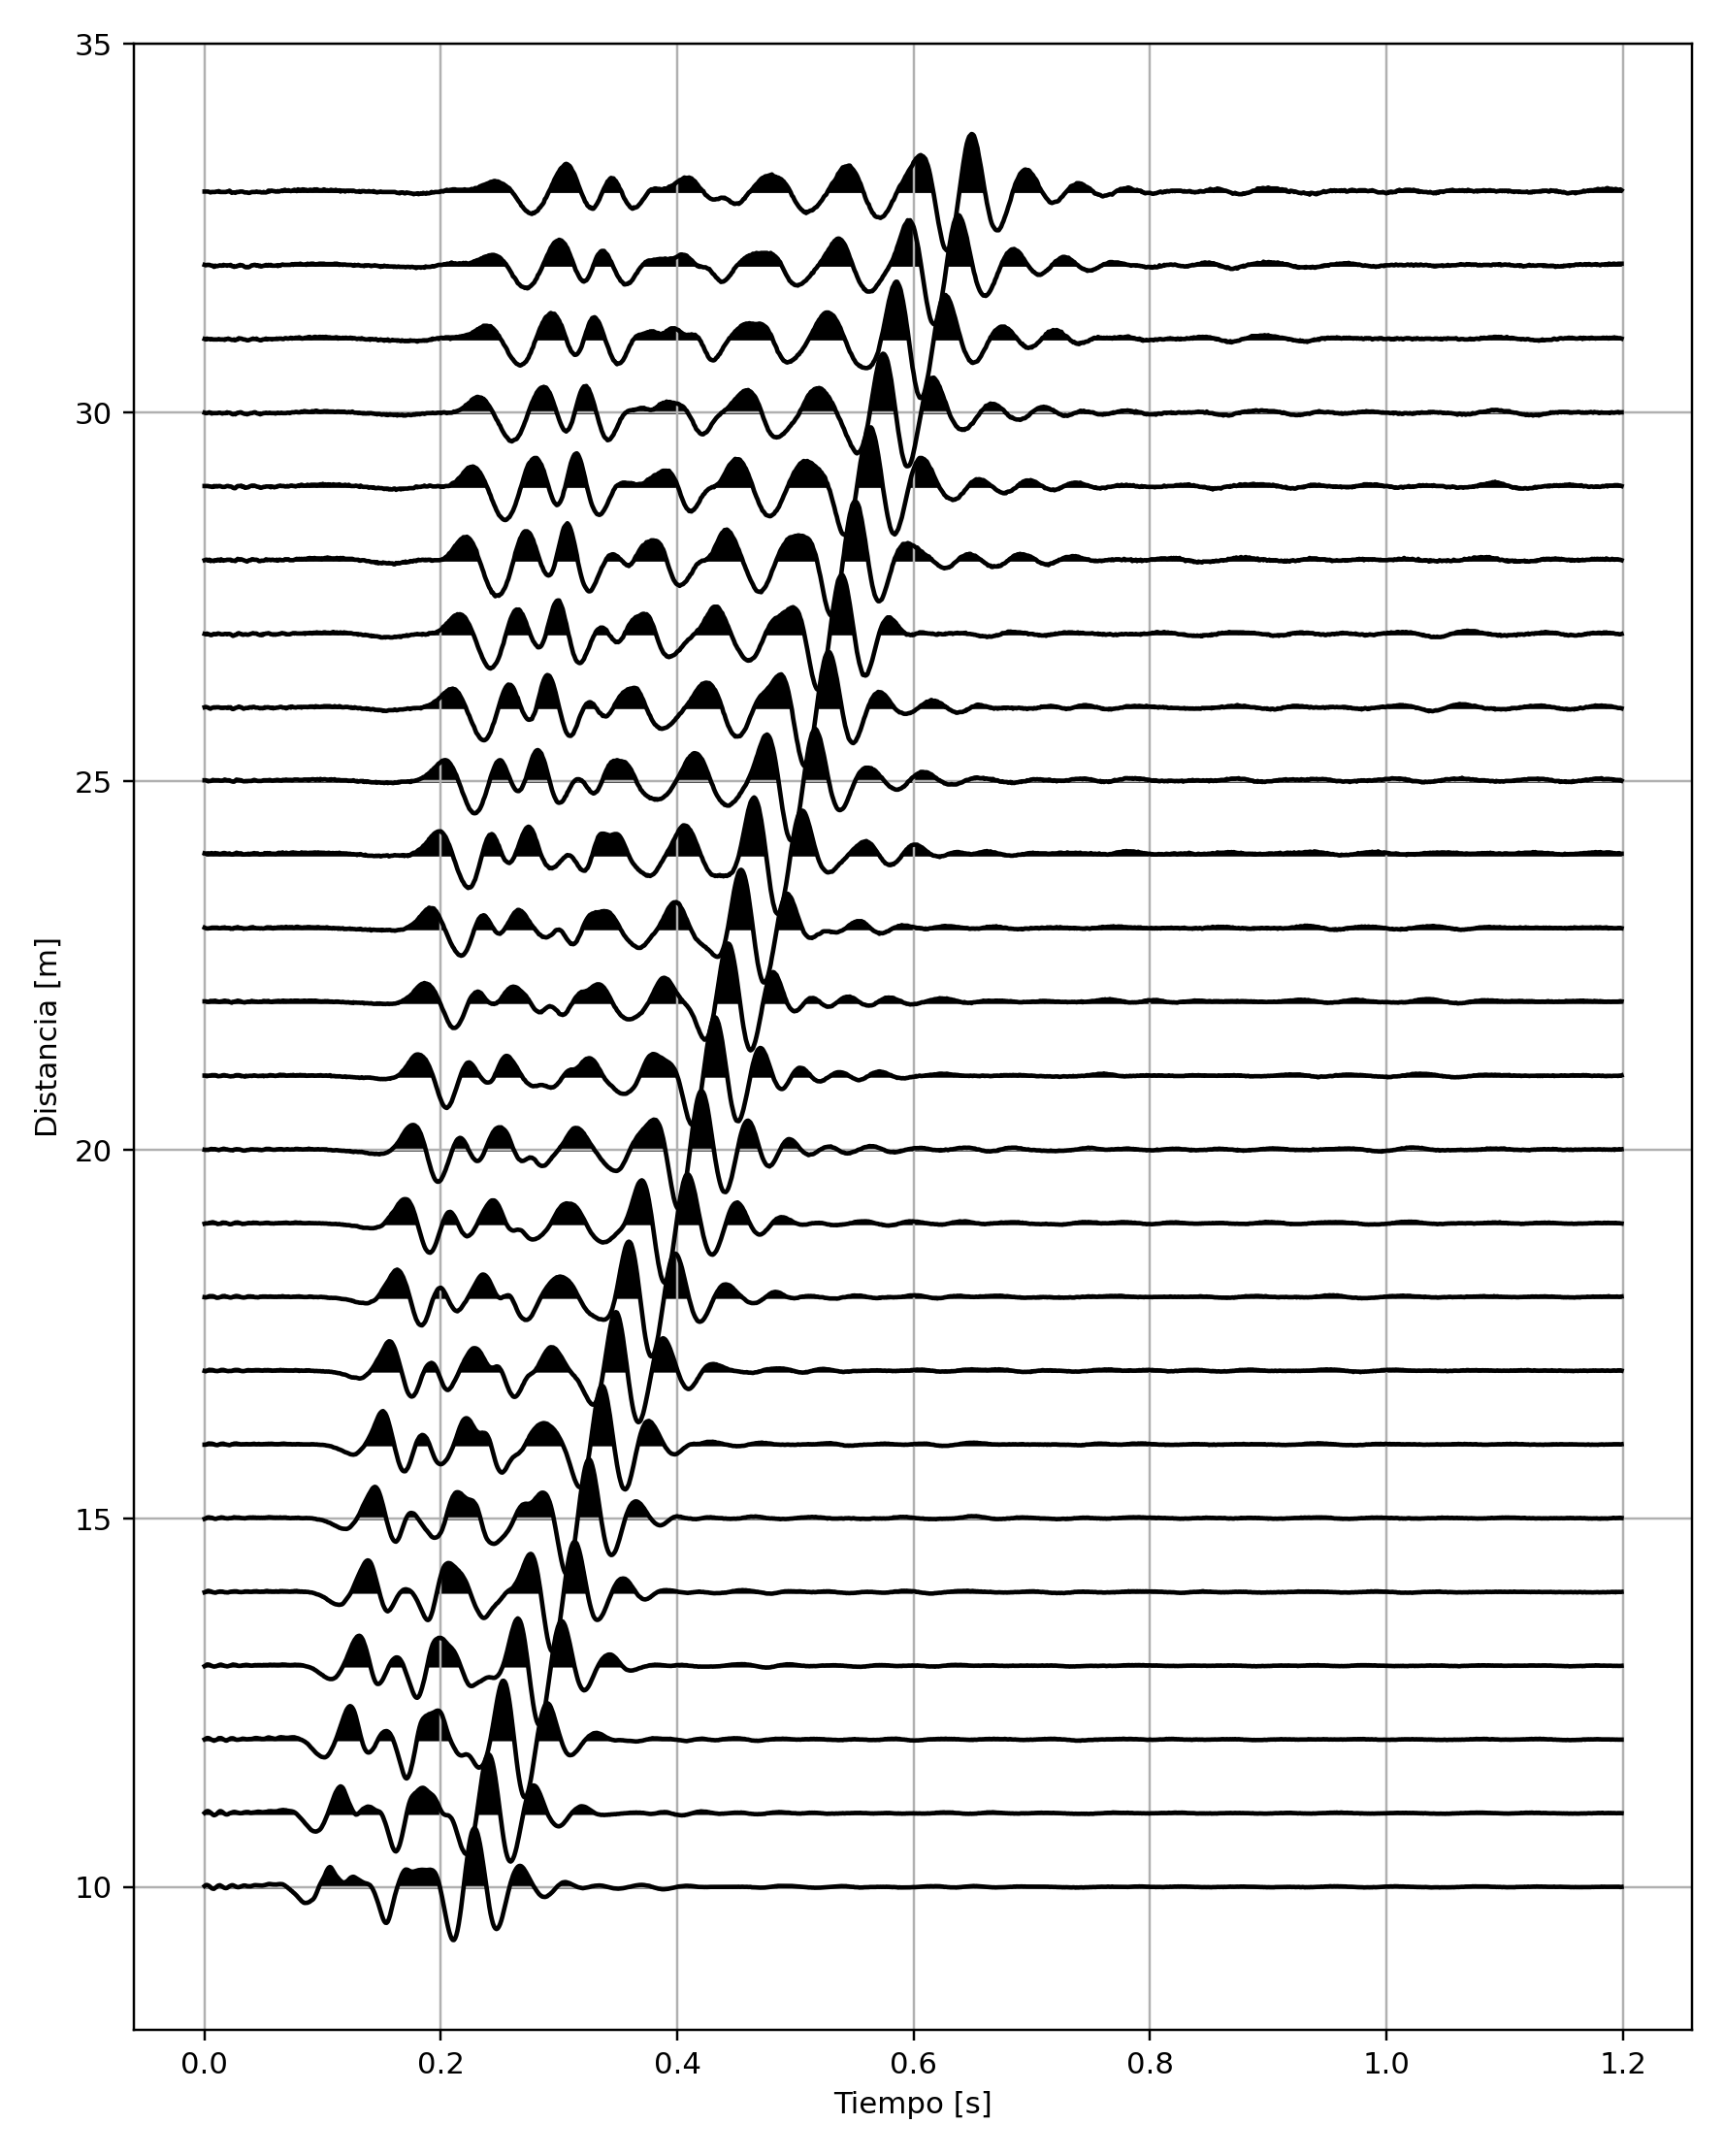

In [13]:
filename    = 'SampleData.dat'
HeaderLines = 7
fs          = 1000 # Hz
N           = 24
x1          = 10   # m
dx          = 1    # m
direction   = 'forward';
Amasw       = masw.masw(filename, 1/fs, fs, N, dx, x1, direction, header=6 )
A           = pd.read_csv(filename, header=6, delimiter="\t", skip_blank_lines=False)
A.head(10)
offset  = 0

dir(Amasw)
Amasw.plot(scale=.8)

A:  (62, 351)
f:  (62,)
c:  (351,)


<IPython.core.display.Javascript object>


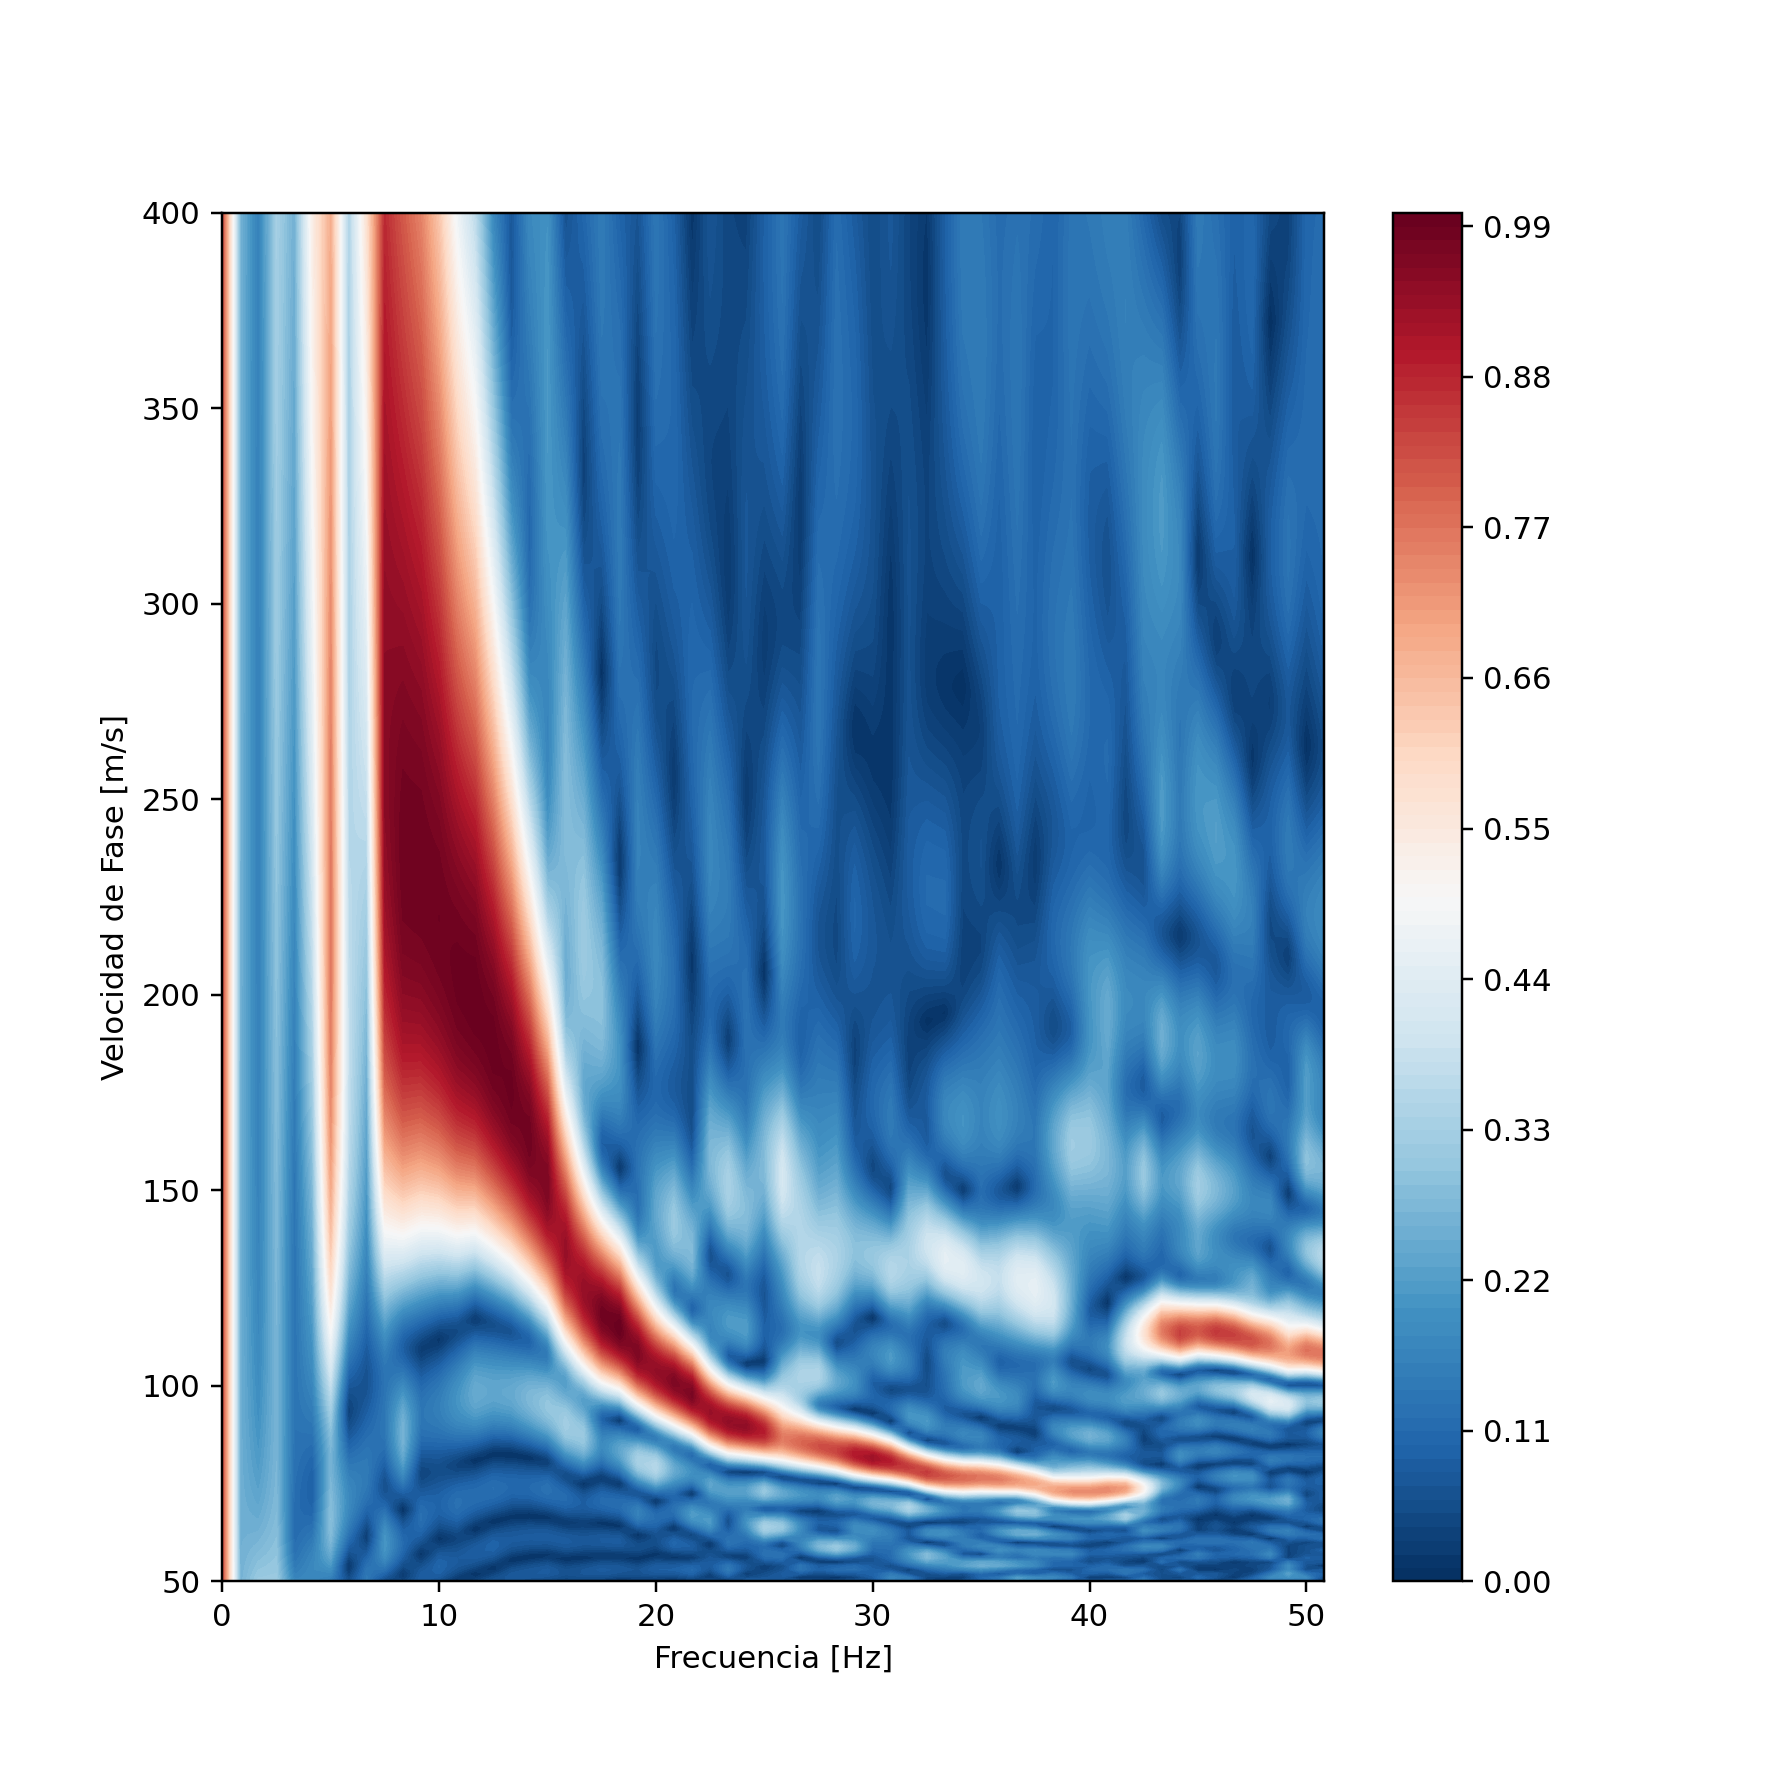

<IPython.core.display.Javascript object>


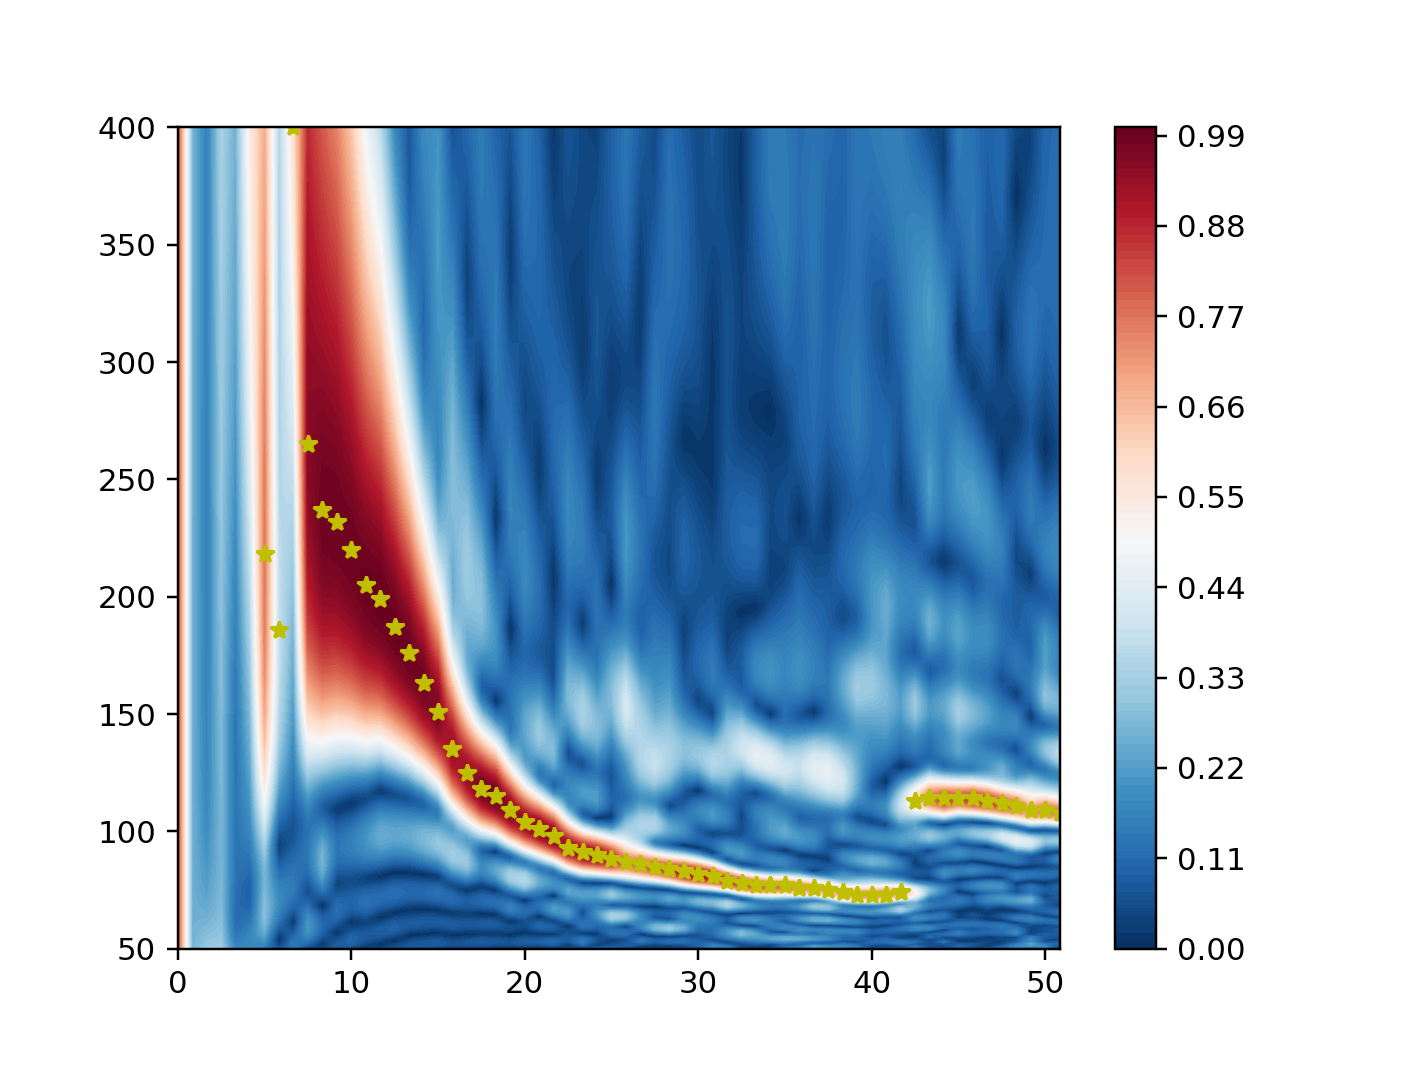

In [14]:
cT_min   = 50   # m/s
cT_max   = 400  # m/s
delta_cT = 1    # m/s

Amasw.dispersion_imaging(cT_min, cT_max, delta_cT)

resolution = 100   # No. de niveles
fmin = 0           # Hz
fmax = 50          # Hz
Amasw.plot_dispersion_image_2D(fmin, fmax, resolution)

f_receivers     = 4.5 # Frecuencia de los geófonos
select          = 'numbers'
up_low_boundary = 'yes'
p               = 0.95  # Porcentaje
fvec, cvec      = Amasw.extract_dispersion_curve(f_receivers, select,up_low_boundary, p)

fig, ax = plt.subplots(1,1)
cn1     = ax.contourf(Amasw.fplot, Amasw.cplot, Amasw.Aplot.T, levels=resolution, cmap="RdBu_r")
ax.plot(fvec, cvec,'y*')
fig.colorbar(cn1,ax=ax)